190501V
Ranathunga R.A.C.D.

In [49]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

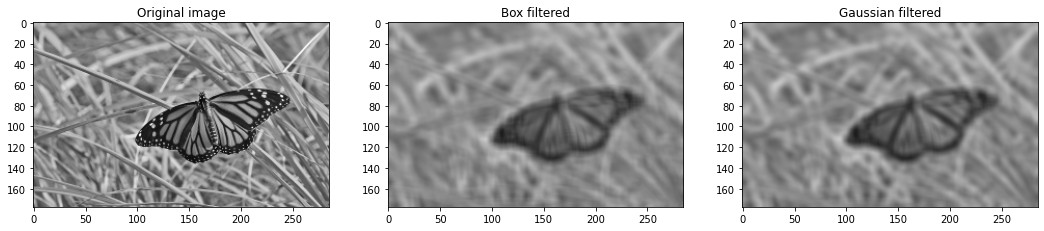

In [50]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

butterfly_image = cv.imread('butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert butterfly_image is not None

k_size = 9
sigma = 4
box_kernel = 1./81*np.ones((9,9))

image_average = cv.filter2D(butterfly_image,-1,box_kernel)

image_gaussian = cv.GaussianBlur(butterfly_image,(k_size, k_size),sigma)

fig, ax = plt.subplots(1,3, figsize = (18,6))

ax[0].imshow(butterfly_image, cmap = 'gray',vmin = 0 ,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(image_average, cmap='gray',vmin = 0 ,vmax=255)
ax[1].set_title("Box filtered")

ax[2].imshow(image_gaussian, cmap='gray',vmin = 0 ,vmax=255)
ax[2].set_title("Gaussian filtered")

plt.show()

Question No : 03

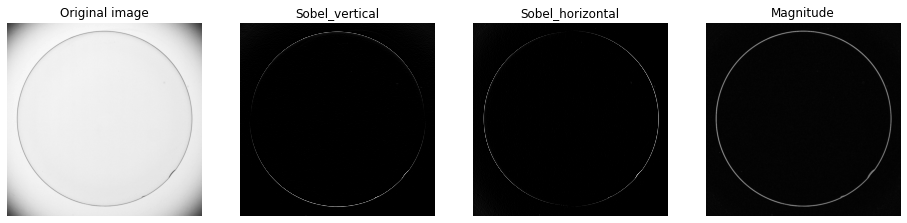

In [51]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

image = cv.imread("contact_lens.tif", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert image is not None

k_size = 9
sigma = 4
box_kernel = 1./81*np.ones((9,9))

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
image_sobel_v = cv.filter2D(image,-1,sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
image_sobel_h = cv.filter2D(image,-1,sobel_h)

grad_mag = np.sqrt(image_sobel_h**2 + image_sobel_v**2)

fig, ax = plt.subplots(1,4, figsize = (16,4))

ax[0].imshow(image, cmap = 'gray',vmin = 0 ,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(image_sobel_v, cmap='gray',vmin = 0 ,vmax=255)
ax[1].set_title("Sobel_vertical")

ax[2].imshow(image_sobel_h, cmap='gray',vmin = 0 ,vmax=255)
ax[2].set_title("Sobel_horizontal")

ax[3].imshow(grad_mag, cmap='gray')
ax[3].set_title("Magnitude")

for i in range(4):
    ax[i].axis('off')

plt.show()

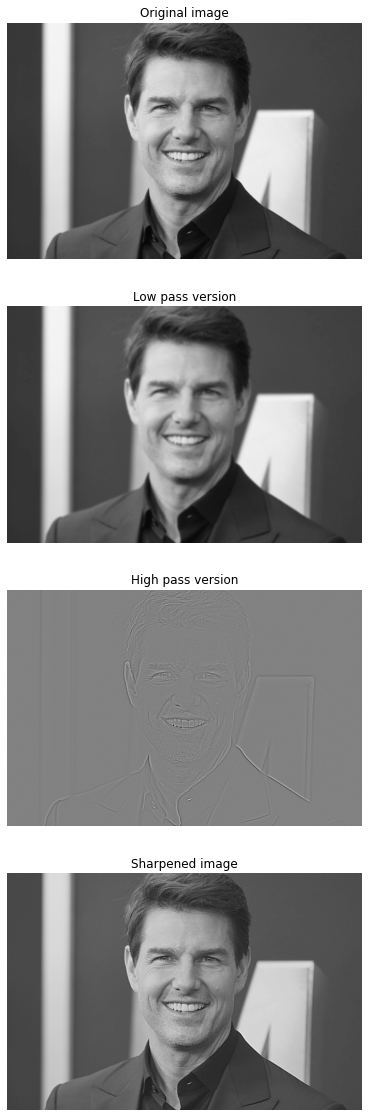

In [52]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

image = cv.imread("tom.jpg", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert image is not None


sigma = 2
gaussian_kernal = cv.getGaussianKernel(5,sigma = sigma)
image_low_pass = cv.sepFilter2D(image,-1, gaussian_kernal, gaussian_kernal)
image_high_pass = image - image_low_pass

image_sharpened = cv.addWeighted(image,1.0, image_high_pass,1.0,0)

fig, ax = plt.subplots(4,1, figsize = (20,20))

ax[0].imshow(image, cmap = 'gray',vmin = 0 ,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(image_low_pass, cmap='gray',vmin = 0 ,vmax=255)
ax[1].set_title("Low pass version")

ax[2].imshow(image_high_pass, cmap='gray')
ax[2].set_title("High pass version")

ax[3].imshow(image_sharpened, cmap='gray')
ax[3].set_title("Sharpened image")

for i in range(4):
    ax[i].axis('off')

plt.show()